# Andrew Ng's Machine Learning Exercise 2a: Logistic regression 
###  (No Regularization)

In [1]:
from __future__ import division

In [17]:
import sys
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline  

In [4]:
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("notebook")

In [5]:
def sns_reset(): 
    """Call this function to toggle back to the sns plotting environment from the matplotlib environment."""
    sns.reset_defaults()
    sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("notebook")

# Call these three functions at the top of the notebook to allow toggling between sns and matplotlib 
# environments while maintaining a uniform plot style throughout.
sns.reset_orig() 
sns_reset()
plt.ion()

# 1 Logistic regression

Load the dataset.

In [6]:
data = np.loadtxt('../../data/exam_scores_admission.txt', delimiter=',')

In [7]:
exam_1 = data[:, 0]
exam_2 = data[:, 1]
y = data[:, 2]

M = len(exam_1)

## 1.1 Visualizing the data

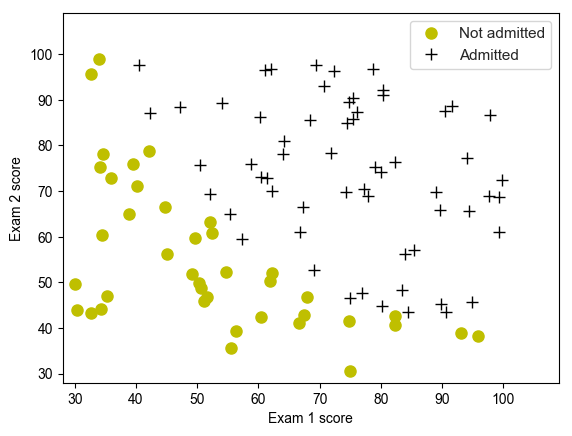

In [9]:
plt.figure()
sns.reset_orig() 
plt.plot(exam_1[y == 0], exam_2[y == 0], 'yo', ms=8, label='Not admitted')
plt.plot(exam_1[y == 1], exam_2[y == 1], 'k+', ms=8, label='Admitted')
sns_reset()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim(28, 109)
plt.ylim(28, 109)
plt.legend(numpoints=1, loc=1)

## 1.2 Implementation

### 1.2.1 Warm up exercise:  sigmoid function

In [10]:
"""Python version of sigmoid.m."""
sigmoid = lambda x: 1 / (1 + np.exp(-x))

### 1.2.2 Cost function and gradient

Add a column of ones to the data matrix that allows us to treat the intercept parameter as a feature.

In [11]:
X = np.vstack((np.ones(M), exam_1, exam_2)).T 

Inialize each of the three model parameters to zero. 

In [12]:
theta_0 = np.zeros(3)

Define the cost function for logistic regression.

In [13]:
cost_history = [] # Use this array to log costs calculated in the call to scipy's "minimize" below.

def cost_function(theta, X, y, M):
    """Python version of costFunction.m."""
    global cost_history
    
    cost = 1 / M * (- y.dot(np.log(sigmoid(theta.dot(X.T)))) - (1 - y).dot(np.log(1 - sigmoid(theta.dot(X.T)))))
    grad = 1 / M * (sigmoid(theta.dot(X.T)) - y).dot(X)

    cost_history.append(cost)
    return cost, grad

Test it.

In [15]:
cost_0, grad_0 = cost_function(theta_0, X, y, M)

print('Cost at initial theta (zeros): %.3f' % cost_0)
print('Gradient at initial theta (zeros):', ', '.join('%.3f' % item for item in grad_0))

Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros): -0.100, -12.009, -11.263


### 1.2.3 Learning parameters using scipy's "minimize"

Run the optimization.

In [31]:
cost_history = []

"""This call to scipy's "minimize" is a Python version of the Octave call to "fminunc"."""  
res = minimize(cost_function, theta_0, method='L-BFGS-B', args=(X, y, M), jac=True)

/Users/rajasoun/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Check the result.

In [32]:
print(res)

      fun: 0.20349770159166272
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.17352668e-07, -2.32115688e-05, -2.58099088e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 27
   status: 0
  success: True
        x: array([-25.16141038,   0.20623233,   0.20147212])


In [21]:
theta = res['x']

print('Cost at best-fit theta: %.3f' % res['fun'])
print('Best-fit theta:', ', '.join('%.3f' % item for item in theta))

Cost at best-fit theta: 0.203
Best-fit theta: -25.161, 0.206, 0.201


Plot cost vs. steps.  Note:  The 1st and 2nd calls to "cost_function" yielded "nan" values, which is why no point appears below for steps 1 and 2. 

(0, 3.8009397276525085)

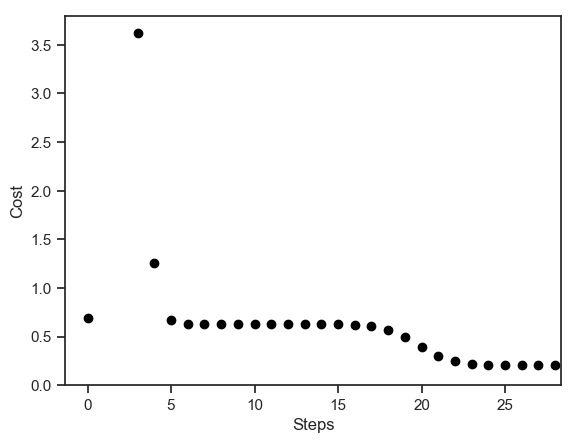

In [22]:
plt.figure()
plt.scatter(np.arange(len(cost_history)), cost_history, c='k', marker='o')
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.xlim(-res['nit'] * 0.05, res['nit'] * 1.05)
plt.ylim(0, max(cost_history) * 1.05)

Plot the decision boundary.

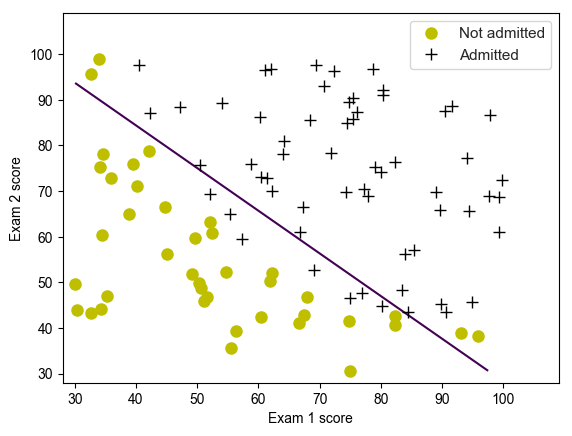

In [24]:
num_pts = 10
x_pts, y_pts = np.ogrid[min(exam_1):max(exam_1):num_pts * 1j, min(exam_2):max(exam_2):num_pts * 1j]

plt.figure()
sns.reset_orig()
plt.plot(exam_1[y == 0], exam_2[y == 0], 'yo', ms=8, label='Not admitted')
plt.plot(exam_1[y == 1], exam_2[y == 1], 'k+', ms=8, label='Admitted')
plt.contour(x_pts.ravel(), y_pts.ravel(), theta[0] + theta[1] * x_pts + theta[2] * y_pts - 0.5, levels=[0])
sns_reset()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim(28, 109)
plt.ylim(28, 109)
plt.legend(numpoints=1, loc=1)

### 1.2.4 Evaluating logistic regression

In [25]:
def prediction(theta, exam_1, exam_2):
    """Python version of predict.m."""
    return sigmoid(theta[0] + exam_1 * theta[1] + exam_2 * theta[2])

def accuracy(theta, exam_1, exam_2, y, M):
    return np.sum(np.around(prediction(theta, exam_1, exam_2)) == y) / M

In [28]:
print('For a student with scores 45 and 85, we predict an admission probability of %.2f.' \
    % prediction(theta, 45, 85))

For a student with scores 45 and 85, we predict an admission probability of 0.78.


In [29]:
print('Train Accuracy: %.2f'% accuracy(theta, exam_1, exam_2, y, M))

Train Accuracy: 0.89
